In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("dadosabertos_graduacao_quantitativo-de-alunos.xlsx")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Começando a EDA

In [130]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CodCurso      2134 non-null   int64 
 1   NomeCurso     2134 non-null   object
 2   Ano           2134 non-null   int64 
 3   Periodo       2134 non-null   int64 
 4   Vinculados    2134 non-null   int64 
 5   Matriculados  2134 non-null   int64 
 6   Ingressantes  2134 non-null   int64 
 7   Diplomados    2134 non-null   int64 
 8   Evadidos      2134 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 150.2+ KB


,CodCurso,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
count,2134.000000,2134.000000,2134.000000,2134.000000,2134.000000,2134.00000,2134.000000,2134.000000
mean,634.377226,2016.495783,1.480319,393.336926,345.304592,39.91940,19.800375,16.964855
std,450.453556,3.937954,0.499730,346.838418,309.233608,42.29803,25.295691,21.530845
min,298.000000,2010.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,318.000000,2013.000000,1.000000,160.000000,138.000000,7.00000,1.000000,3.000000
50%,338.000000,2017.000000,1.000000,256.000000,226.000000,32.00000,12.000000,10.000000
75%,907.000000,2020.000000,2.000000,582.750000,496.750000,53.00000,30.000000,22.000000
max,1880.000000,2023.000000,2.000000,1996.000000,1901.000000,406.00000,308.000000,264.000000


Dados brutos

In [131]:
display(df)

,CodCurso,NomeCurso,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
0,298,ADMINISTRAÇÃO,2010,1,1501,1349,169,91,24
1,583,ADMINISTRAÇÃO - EAD,2010,1,351,345,1,0,6
2,299,AGRONOMIA,2010,1,494,448,50,31,19
3,300,ARQUITETURA E URBANISMO,2010,1,625,578,53,41,12
4,301,ARQUIVOLOGIA,2010,1,157,134,30,4,6
...,...,...,...,...,...,...,...,...,...
2129,1490,RELAÇÕES PÚBLICAS,2023,1,281,248,26,0,1
2130,806,SAÚDE COLETIVA,2023,1,231,158,31,0,2
2131,907,SERVIÇO SOCIAL,2023,1,207,180,48,0,1
2132,302,TEATRO,2023,1,242,205,39,0,1


Relação que pode haver entre ingressantes e evadidos

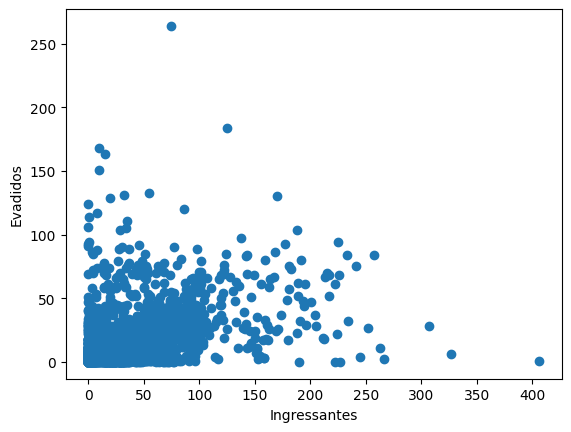

In [132]:
# Gráfico de dispersão
plt.scatter(df['Ingressantes'], df['Evadidos'])
plt.xlabel("Ingressantes")
plt.ylabel("Evadidos")
plt.show()

Calculando apenas ingressantes e evadidos por ano

In [133]:
dens_por_ano = df[["Ano","Ingressantes","Evadidos"]].groupby("Ano").sum().reset_index()


In [134]:
display(dens_por_ano)
print(type(dens_por_ano))

,Ano,Ingressantes,Evadidos
0,2010,5093,2312
1,2011,5748,2552
2,2012,6163,2468
3,2013,6476,2272
4,2014,7085,2638
5,2015,6809,2646
6,2016,6690,3450
7,2017,6255,3640
8,2018,7128,2991
9,2019,6183,3523


<class 'pandas.core.frame.DataFrame'>


In [135]:
ev_por_ano = dens_por_ano[['Ano', 'Evadidos']].copy()

In [136]:
print(ev_por_ano)

     Ano  Evadidos
0   2010      2312
1   2011      2552
2   2012      2468
3   2013      2272
4   2014      2638
5   2015      2646
6   2016      3450
7   2017      3640
8   2018      2991
9   2019      3523
10  2020      1593
11  2021      1374
12  2022      4591
13  2023       153


Correlação entre Ingressantes e Evadidos: 0.37301185121925545


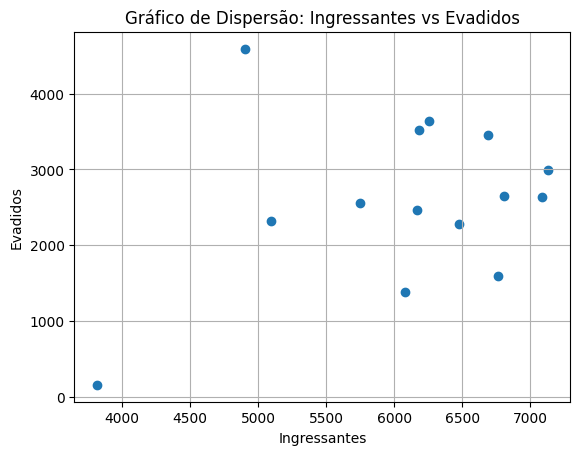

In [137]:
# Calcular a correlação entre as colunas 'Ingressantes' e 'Evadidos'
correlacao = df['Ingressantes'].corr(df['Evadidos'])

print("Correlação entre Ingressantes e Evadidos:", correlacao)

# Extrair as colunas de interesse para o gráfico de dispersão
x = dens_por_ano['Ingressantes']
y = dens_por_ano['Evadidos']

# Plotar o gráfico de dispersão
plt.scatter(x, y)
plt.xlabel('Ingressantes')
plt.ylabel('Evadidos')
plt.title('Gráfico de Dispersão: Ingressantes vs Evadidos')
plt.grid(True)
plt.show()

GRÁFICO INGRESSANTES E EVADIDOS AO LONGO DOS ANOS NA UFRGS

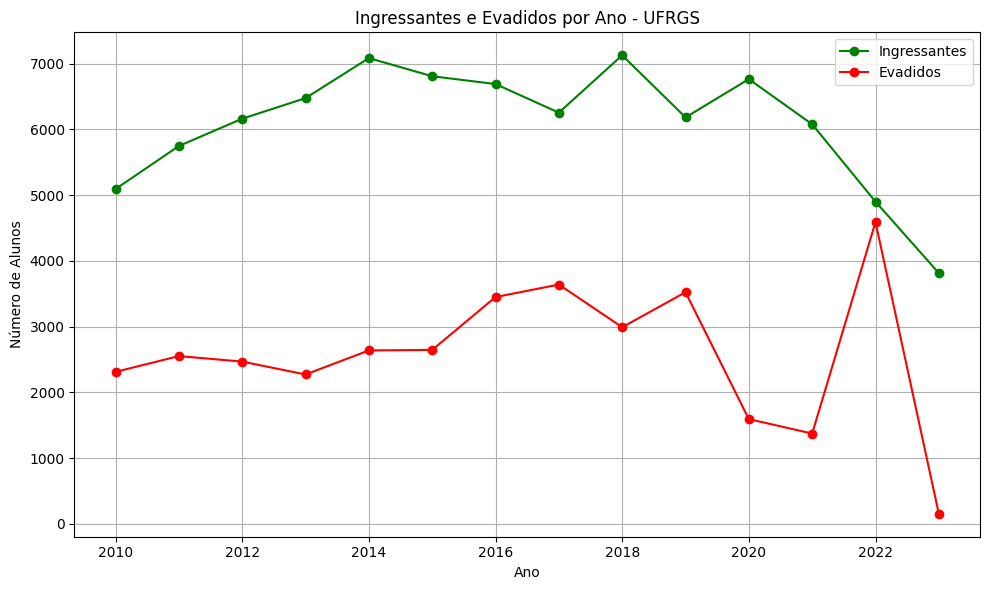

In [138]:
# Plotar os dados
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura
plt.plot(dens_por_ano["Ano"], dens_por_ano["Ingressantes"], label='Ingressantes',color='green', marker='o')  # Plotar ingressantes
plt.plot(dens_por_ano["Ano"], dens_por_ano["Evadidos"], label='Evadidos',color='red', marker='o')  # Plotar evadidos

# Adicionar rótulos aos eixos
plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Ingressantes e Evadidos por Ano - UFRGS')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()  # Ajustar o layout para evitar que as legendas se sobreponham
plt.show()

Densidade por curso e evasão por curso

In [139]:
ing_por_curso = df[["NomeCurso","Ingressantes"]].groupby("NomeCurso").sum()

In [140]:
display(ing_por_curso)

,Ingressantes
NomeCurso,
ADMINISTRAÇÃO,4283
ADMINISTRAÇÃO - EAD,1
ADMINISTRAÇÃO PÚBLICA E SOCIAL,714
AGRONOMIA,1248
ARQUITETURA E URBANISMO,1479
...,...
SAÚDE COLETIVA,785
SERVIÇO SOCIAL,497
TEATRO,623


Ordenando ingressantes em ordem descrescente

In [141]:
ing_por_curso.sort_values(by="Ingressantes",ascending=False)

,Ingressantes
NomeCurso,
CIÊNCIAS JURÍDICAS E SOCIAIS,4306
ADMINISTRAÇÃO,4283
LETRAS,3390
CIÊNCIAS SOCIAIS,2798
EDUCAÇÃO FÍSICA,2544
...,...
ADMINISTRAÇÃO - EAD,1
MÚSICA - ENSINO A DISTÂNCIA - EAD,0
ARTES VISUAIS - ENSINO A DISTÂNCIA - EAD,0


Calculando agora os evadidos e ingressantes exclusivamente nos cursos de CIC e ECP

In [142]:
# Filtrar os dados para os cursos 'CIÊNCIA DA COMPUTAÇÃO' e 'ENGENHARIA DE COMPUTAÇÃO'
df_filtrado = df[df['NomeCurso'].isin(['CIÊNCIA DA COMPUTAÇÃO', 'ENGENHARIA DE COMPUTAÇÃO'])]

# Agrupar por ano e calcular a soma de evadidos por ano
ev_por_ano_f = df_filtrado.groupby('Ano')['Evadidos'].sum()

# Transformar a série em um DataFrame
df_evadidos = pd.DataFrame({'Ano': ev_por_ano_f.index, 'Evadidos': ev_por_ano_f.values})

ev_por_ano_f = df_evadidos

# Exibir o DataFrame resultante
print(ev_por_ano_f)



     Ano  Evadidos
0   2010        75
1   2011        75
2   2012        77
3   2013        64
4   2014        70
5   2015        62
6   2016       139
7   2017       107
8   2018        87
9   2019       118
10  2020        52
11  2021        38
12  2022       153
13  2023         4


In [143]:
# Filtrar os dados para os cursos 'CIÊNCIA DA COMPUTAÇÃO' e 'ENGENHARIA DE COMPUTAÇÃO'
df_filtrado = df[df['NomeCurso'].isin(['CIÊNCIA DA COMPUTAÇÃO', 'ENGENHARIA DE COMPUTAÇÃO'])]

# Agrupar por ano e calcular a soma de evadidos por ano
ing_por_ano_f = df_filtrado.groupby('Ano')['Ingressantes'].sum()


# Transformar a série em um DataFrame
df_ingressantes = pd.DataFrame({'Ano': ing_por_ano_f.index, 'Ingressantes': ing_por_ano_f.values})

ing_por_ano_f = df_ingressantes
# Exibir o DataFrame resultante
print(ing_por_ano_f)

     Ano  Ingressantes
0   2010           168
1   2011           200
2   2012           180
3   2013           178
4   2014           227
5   2015           210
6   2016           230
7   2017           214
8   2018           162
9   2019           198
10  2020           233
11  2021           206
12  2022           191
13  2023           134


,Ano,Evadidos
0,2010,75
1,2011,75
2,2012,77
3,2013,64
4,2014,70
5,2015,62
6,2016,139
7,2017,107
8,2018,87
9,2019,118


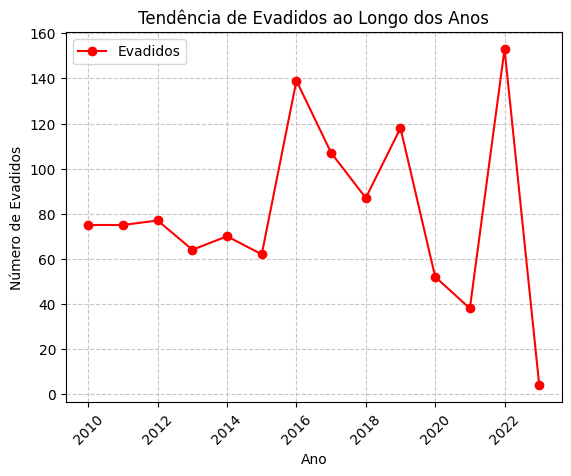

<class 'pandas.core.frame.DataFrame'>


In [144]:
display(ev_por_ano_f)
# Plotar o gráfico de linhas
ev_por_ano_f.plot(x='Ano', y='Evadidos', kind='line', marker='o', color='red')
plt.title('Tendência de Evadidos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Evadidos')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(type(ev_por_ano_f))

GRÁFICO INGRESSANTES E EVADIDOS - UFRGS

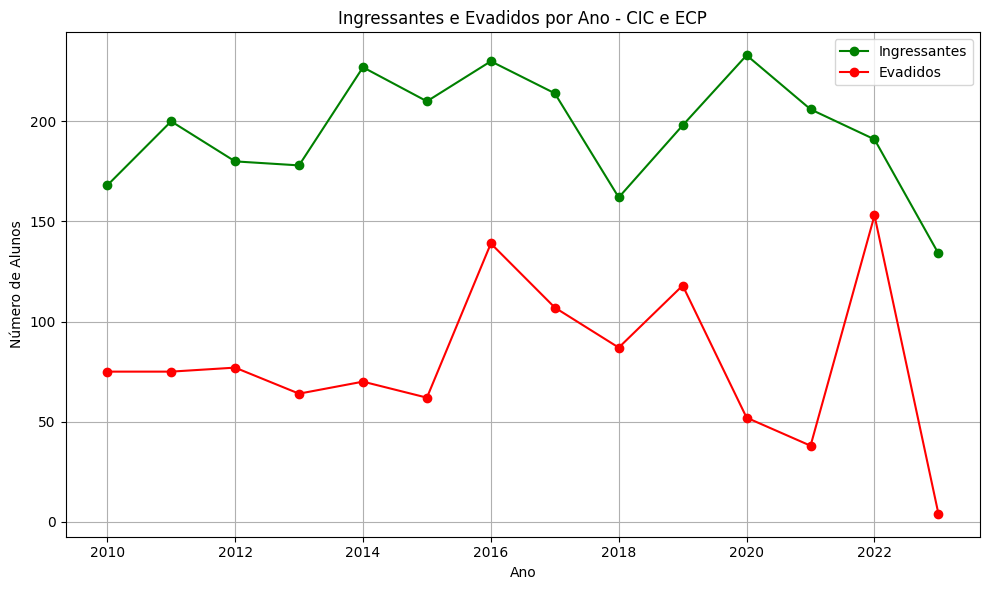

In [145]:
import matplotlib.pyplot as plt

# Suponha que você já tenha os DataFrames dens_por_ano e ev_por_ano

# Extrair os dados para plotagem
anos_densidade = ing_por_ano_f['Ano'] # Anos para o DataFrame dens_por_ano
ingressantes = ing_por_ano_f['Ingressantes']  # Dados de ingressantes
anos_evadidos = ev_por_ano_f['Ano']  # Anos para o DataFrame ev_por_ano
evadidos = ev_por_ano_f['Evadidos']  # Dados de evadidos

# Plotar os dados
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura
plt.plot(anos_densidade, ingressantes, label='Ingressantes',color='green', marker='o')  # Plotar ingressantes
plt.plot(anos_evadidos, evadidos, label='Evadidos',color='red', marker='o')  # Plotar evadidos

# Adicionar rótulos aos eixos
plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Ingressantes e Evadidos por Ano - CIC e ECP')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()  # Ajustar o layout para evitar que as legendas se sobreponham
plt.show()

In [146]:
df_completo = pd.merge(ing_por_ano_f, ev_por_ano_f, on='Ano')

# Exibir o DataFrame resultante
print(df_completo)
print(type(df_completo))

     Ano  Ingressantes  Evadidos
0   2010           168        75
1   2011           200        75
2   2012           180        77
3   2013           178        64
4   2014           227        70
5   2015           210        62
6   2016           230       139
7   2017           214       107
8   2018           162        87
9   2019           198       118
10  2020           233        52
11  2021           206        38
12  2022           191       153
13  2023           134         4
<class 'pandas.core.frame.DataFrame'>


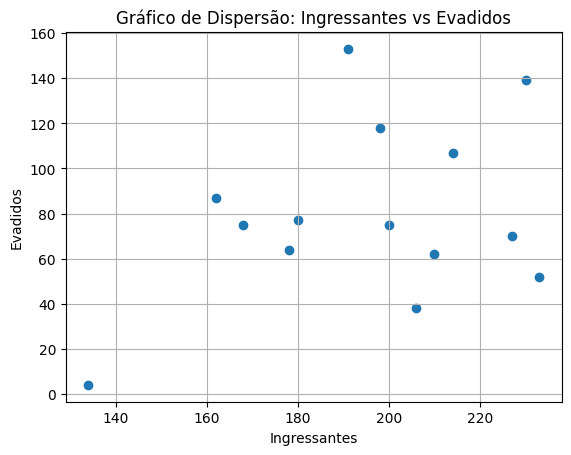

In [147]:
# Extrair as colunas de interesse para o gráfico de dispersão
x = df_completo['Ingressantes']
y = df_completo['Evadidos']

# Plotar o gráfico de dispersão
plt.scatter(x, y)
plt.xlabel('Ingressantes')
plt.ylabel('Evadidos')
plt.title('Gráfico de Dispersão: Ingressantes vs Evadidos')
plt.grid(True)
plt.show()

Matriz de correlação do dataset

              CodCurso       Ano   Periodo  Vinculados  Matriculados  \
CodCurso      1.000000  0.180611 -0.002119   -0.517706     -0.510474   
Ano           0.180611  1.000000 -0.066271    0.008531      0.001647   
Periodo      -0.002119 -0.066271  1.000000   -0.001870      0.001016   
Vinculados   -0.517706  0.008531 -0.001870    1.000000      0.990631   
Matriculados -0.510474  0.001647  0.001016    0.990631      1.000000   
Ingressantes -0.354370 -0.039342 -0.231364    0.755053      0.753203   
Diplomados   -0.401278 -0.087595  0.186573    0.715842      0.730700   
Evadidos     -0.311773 -0.039484  0.127625    0.565048      0.491777   

              Ingressantes  Diplomados  Evadidos  
CodCurso         -0.354370   -0.401278 -0.311773  
Ano              -0.039342   -0.087595 -0.039484  
Periodo          -0.231364    0.186573  0.127625  
Vinculados        0.755053    0.715842  0.565048  
Matriculados      0.753203    0.730700  0.491777  
Ingressantes      1.000000    0.427640  0.373

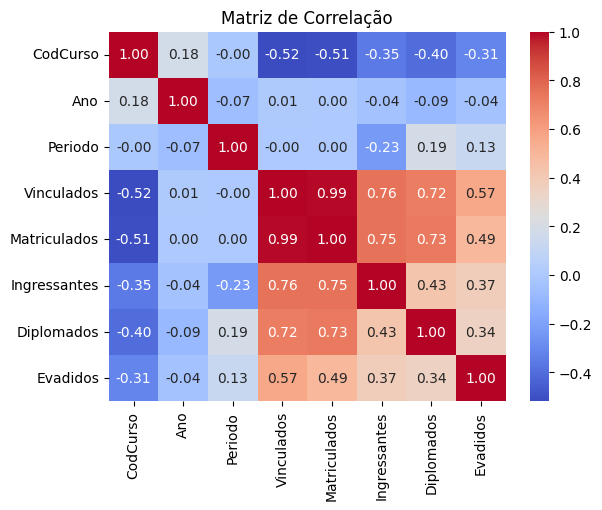

In [148]:
# Suponha que você tenha um DataFrame chamado df com seus dados
# Selecione apenas as colunas numéricas, se necessário
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = df_numeric.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Plotar mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

modelagem OLS

In [149]:
import statsmodels.api as sm
model = sm.OLS(df_completo['Evadidos'],df_completo['Ingressantes'])

results = model.fit()

print(results.summary())

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                 OLS Regression Results                                
Dep. Variable:               Evadidos   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              67.85
Date:                Sun, 24 Mar 2024   Prob (F-statistic):                    1.62e-06
Time:                        23:20:29   Log-Likelihood:                         -69.847
No. Observations:                  14   AIC:                                      141.7
Df Residuals:                      13   BIC:                                      142.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

O p-valor é uma medida que ajuda a determinar a significância estatística de um coeficiente na regressão. Ele indica a probabilidade de obter um resultado tão extremo quanto o observado, sob a suposição de que a hipótese nula seja verdadeira.

Em geral, se o p-valor associado a um coeficiente for menor que um determinado nível de significância (geralmente escolhido como 0.05), então rejeitamos a hipótese nula. Isso sugere que existe uma relação estatisticamente significativa entre a variável independente associada a esse coeficiente e a variável dependente.

Portanto, se o p-valor associado ao coeficiente for este, que é muito menor que o nível de significância comum de 0.05, então podemos considerar que o coeficiente é estatisticamente significativo e rejeitar a hipótese nula associada a esse coeficiente. Isso implica que a variável independente associada a esse coeficiente tem um efeito estatisticamente significativo na variável dependente.

In [150]:
model2 = sm.OLS(df['Evadidos'],df['Ingressantes'])

results = model2.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Evadidos   R-squared (uncentered):                   0.407
Model:                            OLS   Adj. R-squared (uncentered):              0.407
Method:                 Least Squares   F-statistic:                              1464.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):                   2.64e-244
Time:                        23:20:30   Log-Likelihood:                         -9535.8
No. Observations:                2134   AIC:                                  1.907e+04
Df Residuals:                    2133   BIC:                                  1.908e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------